<a href="https://colab.research.google.com/github/Darafarm/Darafarm/blob/main/medical_Insurance_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
insurance = pd.read_csv('Medical_insurance_dataset - Medical_insurance_dataset.csv')
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


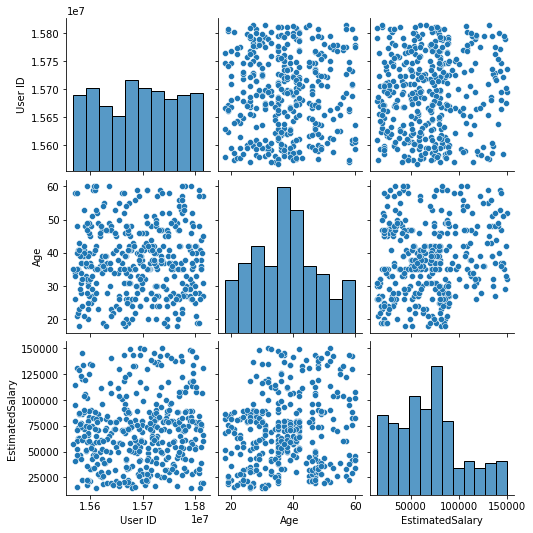

In [ ]:
sns.pairplot(insurance)

In [ ]:
insured = insurance.drop(['Gender', 'Purchased'], axis = 1)

<AxesSubplot:>

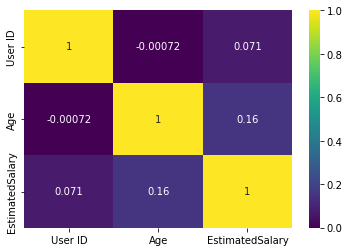

In [ ]:
sns.heatmap(insured.corr(), annot = True, cmap = 'viridis')

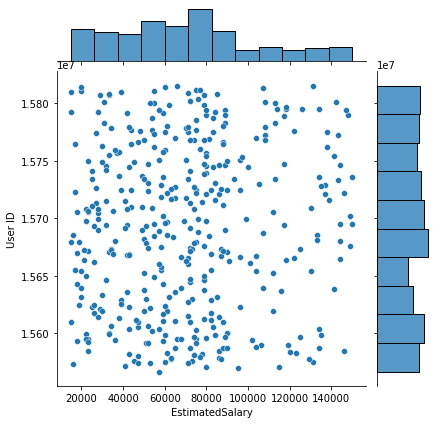

In [ ]:
sns.jointplot(x = 'EstimatedSalary', y = 'User ID', data = insurance)

In [ ]:
insurance['Purchased'].value_counts()

not-purchased    257
purchased        143
Name: Purchased, dtype: int64

In [ ]:
insurance['Purchased'] = insurance['Purchased'].apply(lambda x: 1 if x =='purchased' else 0)

In [ ]:
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
insurance['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

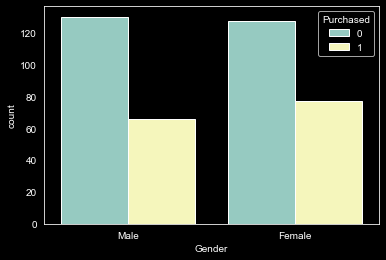

In [ ]:


sns.countplot(x = "Gender", hue = "Purchased", data = insurance)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

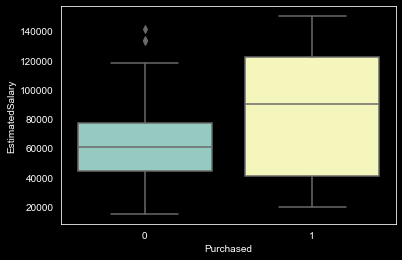

In [ ]:
sns.set_style('white')
plt.style.use('dark_background')
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = insurance)

In [ ]:
 x= insurance[insurance.Purchased == 1]['EstimatedSalary'].mean()

In [ ]:
len(insurance[insurance.Purchased == 1]['EstimatedSalary'][insurance[insurance.Purchased == 1]['EstimatedSalary'] < x])/len(insurance) * 100

15.75

In [ ]:
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
insurance['Gender'] = pd.get_dummies(insurance['Gender'], prefix = 'Gender', drop_first = True)

In [ ]:
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

In [ ]:
X = insurance.drop(["Purchased"], axis= "columns") # droping the label variable (Purchased) from the data
y = insurance["Purchased"]

In [ ]:
X.head()

,User ID,Gender,Age,EstimatedSalary,y
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
X

,User ID,Gender,Age,EstimatedSalary,y
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(X,y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1152x648 with 0 Axes>

In [ ]:
X.corrwith(y)

User ID            0.007120
Gender            -0.042469
Age                0.622454
EstimatedSalary    0.362083
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_prediction = log.predict(X_test)

In [ ]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

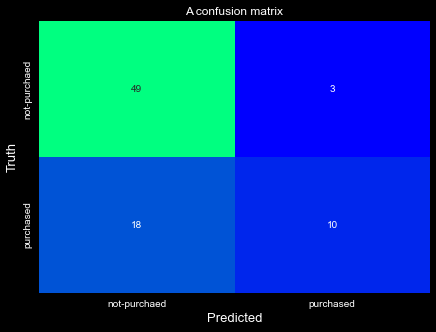

In [ ]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

In [ ]:
metrics.accuracy_score(y_test, logistic_prediction)

0.7375

In [ ]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = randomforestmodel.predict(X_test)

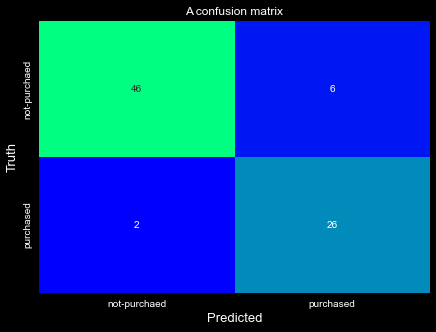

In [ ]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchaed", "purchased"])

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.9

In [ ]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80

